#  Analysis of Ford GoBike System Dataset
## by Ezekiel Okato

## Introduction
This document explores the Ford GoBikes System dataset which is about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Attributes contained in the dataset that are explored include: the members' genders, ages, user status, sharing profiles, day,and the duration of trips. There are approximately 184,000 recorded trips in the dataset.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load dataset into a pandas dataframe for exploration
bikes = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# get an overview of the data shape
print(bikes.shape)
bikes.head(4)

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No


In [4]:
# check the composition of the dataframe
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# overview of missing data in each column
bikes.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# remove all rows with missing data
bikes.dropna(axis=0, inplace=True)

# rename the duration coolumn
bikes.rename(columns = {'duration_sec':'duration'}, inplace = True) 

# changing values in duration column from seconds to minutes
bikes['duration'] = bikes['duration'].apply(lambda x: x/60)

# changing datatypes of columns
bikes = bikes.astype({'bike_id': str, 'start_station_id': str,'end_station_id': str,'start_station_latitude': str,'start_station_longitude': str,'end_station_latitude': str,'end_station_longitude': str, 'member_birth_year': int})

# changing daatypes o datetime
bikes[['start_time', 'end_time']] = bikes[['start_time', 'end_time']].apply(pd.to_datetime)



In [7]:
# combining coordinates to form a single column
bikes['start_coordinates'] = bikes[['start_station_latitude', 'start_station_longitude']].agg(lambda x: ','.join(x.values), axis=1).T

bikes['end_coordinates'] = bikes[['end_station_latitude', 'end_station_longitude']].agg(lambda x: ','.join(x.values), axis=1).T

# removing columns from the dataframe
bikes.drop(columns = ['start_station_latitude', 'start_station_longitude','end_station_latitude', 'end_station_longitude'], inplace = True)

bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration                 174952 non-null  float64       
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  object        
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  object        
 8   user_type                174952 non-null  object        
 9   member_birth_year        174952 non-null  int32         
 10  member_gender            174952 non-null  object        
 11  bike_share_for_all_trip  174952 non-null  object        
 12  start_coordinate

In [8]:
# create day, date and time columns from the time columns
bikes['start_day']= bikes['start_time'].dt.day_name()
bikes['start_date']= bikes['start_time'].dt.date
bikes['start_time']= bikes['start_time'].dt.time

bikes['end_day']= bikes['end_time'].dt.day_name()
bikes['end_date']= bikes['end_time'].dt.date
bikes['end_time']= bikes['end_time'].dt.time

bikes.columns

Index(['duration', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip', 'start_coordinates', 'end_coordinates',
       'start_day', 'start_date', 'end_day', 'end_date'],
      dtype='object')

In [9]:
order_var = pd.api.types.CategoricalDtype(ordered=True,
                            categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'])
bikes['start_day'] = bikes['start_day'].astype(order_var)
bikes['end_day'] = bikes['end_day'].astype(order_var)

In [10]:
# creating an age column with values from the birth year column
bikes['member_age'] = pd.to_datetime(bikes['start_date']).dt.year - bikes['member_birth_year']
bikes.drop(columns = ['member_birth_year'], inplace = True)

In [11]:
# re-arrange the columns in the dataframe
bikes = bikes.reindex(columns = ['bike_id',
                                 'start_station_id','start_station_name','start_coordinates','start_date','start_day','start_time',
                                'end_station_id','end_station_name','end_coordinates','end_date','end_day','end_time',
                                 'duration','user_type', 'member_gender','member_age', 'bike_share_for_all_trip'
                                ])

In [12]:
# sample overview of the data
bikes.sample(10)

,bike_id,start_station_id,start_station_name,start_coordinates,start_date,start_day,start_time,end_station_id,end_station_name,end_coordinates,end_date,end_day,end_time,duration,user_type,member_gender,member_age,bike_share_for_all_trip
76091,2339,191.0,Market St at 40th St,"37.8305452,-122.2739367",2019-02-19,Tuesday,08:32:14.715000,202.0,Washington St at 8th St,"37.8007544,-122.2748943",2019-02-19,Tuesday,08:44:22.669000,12.116667,Customer,Male,36,No
165598,5549,15.0,San Francisco Ferry Building (Harry Bridges Pl...,"37.795392,-122.394203",2019-02-05,Tuesday,06:30:53.371000,21.0,Montgomery St BART Station (Market St at 2nd St),"37.7896254,-122.400811",2019-02-05,Tuesday,06:35:03.660000,4.166667,Subscriber,Male,72,No
24232,4960,22.0,Howard St at Beale St,"37.789756,-122.394643",2019-02-25,Monday,18:29:12.056000,350.0,8th St at Brannan St,"37.771431362921085,-122.40578681230544",2019-02-25,Monday,18:42:55.861000,13.716667,Subscriber,Male,32,No
93794,3429,3.0,Powell St BART Station (Market St at 4th St),"37.78637526861584,-122.40490436553954",2019-02-15,Friday,17:16:10.682000,11.0,Davis St at Jackson St,"37.79728,-122.398436",2019-02-15,Friday,17:24:43.734000,8.550000,Subscriber,Male,61,No
177334,3186,58.0,Market St at 10th St,"37.776619,-122.417385",2019-02-01,Friday,23:04:44.023000,356.0,Valencia St at Clinton Park,"37.769188178104585,-122.42228507995604",2019-02-01,Friday,23:18:14.527000,13.500000,Subscriber,Male,25,No
135452,5532,19.0,Post St at Kearny St,"37.788975,-122.403452",2019-02-08,Friday,12:57:30.159000,20.0,Mechanics Monument Plaza (Market St at Bush St),"37.7913,-122.399051",2019-02-08,Friday,12:59:40.433000,2.166667,Subscriber,Male,27,No
176880,5380,62.0,Victoria Manalo Draves Park,"37.77779057034257,-122.40643188357352",2019-02-02,Saturday,09:59:29.613000,62.0,Victoria Manalo Draves Park,"37.77779057034257,-122.40643188357352",2019-02-02,Saturday,10:02:11.541000,2.683333,Subscriber,Male,29,No
43113,2502,90.0,Townsend St at 7th St,"37.771058,-122.402717",2019-02-22,Friday,16:59:56.082000,61.0,Howard St at 8th St,"37.7765126,-122.4113061",2019-02-22,Friday,17:05:35.416000,5.650000,Subscriber,Male,35,No
134044,5092,243.0,Bancroft Way at College Ave,"37.8693603,-122.2543374",2019-02-08,Friday,18:00:01.846000,267.0,Derby St at College Ave,"37.8618037,-122.2535687",2019-02-08,Friday,18:05:37.567000,5.583333,Subscriber,Male,24,Yes
49708,6117,19.0,Post St at Kearny St,"37.788975,-122.403452",2019-02-21,Thursday,20:39:14.053000,86.0,Market St at Dolores St,"37.7693053,-122.4268256",2019-02-21,Thursday,20:53:01.220000,13.783333,Customer,Female,32,No


In [13]:
# descriptive statistics of numeric variables
bikes.describe()

,duration,member_age
count,174952.000000,174952.000000
mean,11.733379,34.196865
std,27.370082,10.118731
min,1.016667,18.000000
25%,5.383333,27.000000
50%,8.500000,32.000000
75%,13.150000,39.000000
max,1409.133333,141.000000


### What is the structure of your dataset?

The number of trips in the dataset is 183412. Initially, the dataset had 16 variables (numeric and non-numeric). However, after cleaning the data the number of trips remaining to be analysed is 174952. The columns to be analysed are  `duration` and `member_age` columns that are numeric in nature and `user_type`, `member_gender`, `bike_share_for_all_trip` and `start_day` that are categorical in nature.

### What is/are the main feature(s) of interest in your dataset?

I am mostly interested in determining the effect of different features on the duration of bike trips in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the day of the trip will the strongest effect on the duration of the trip: weekends will have longer durations of trips as compared to weekdays. I also expect the other features to have significant effect on the trip duration. 

## Univariate Exploration
Firstly, I'll check the distribution of the main variable which is the length of duration of the trips.



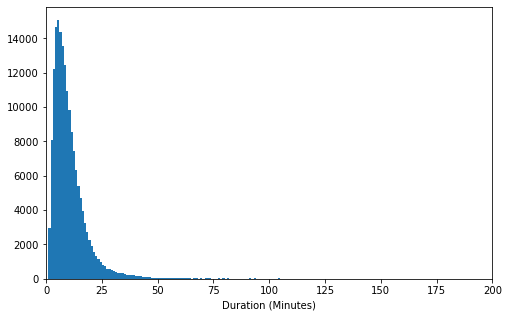

In [14]:
# plot trip duration a standard-scaled plot
binsize = 1
bins = np.arange(0, bikes['duration'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bikes, x = 'duration', bins = bins)
plt.xlim([0,200])
plt.xlabel('Duration (Minutes)')
plt.show()

In [15]:
np.log10(bikes['duration'].describe())

count    5.242919
mean     1.069423
std      1.437276
min      0.007179
25%      0.731051
50%      0.929419
75%      1.118926
max      3.148952
Name: duration, dtype: float64

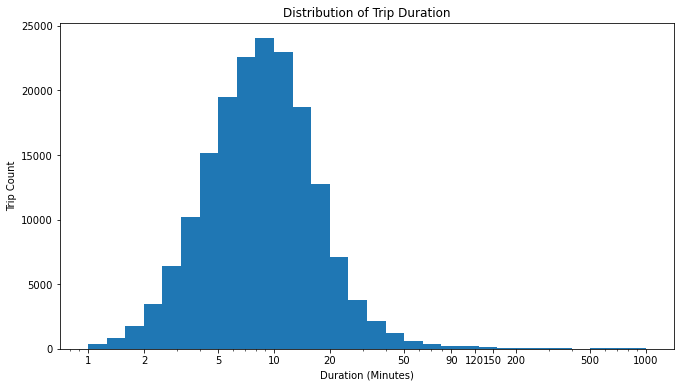

In [16]:
plt.figure(figsize=[11, 6])

bins = 10 ** np.arange(0, 3+0.1, 0.1) # get ticks for bins between min and max duration

ticks = [ 1, 2, 5, 10, 20, 50, 90, 120, 150, 200, 500, 1000]
labels = ['{}'.format(v) for v in ticks]

plt.hist(data = bikes, x = 'duration', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)

plt.xlabel('Duration (Minutes)')
plt.ylabel('Trip Count')
plt.title('Distribution of Trip Duration')
plt.show()

The length of duration has a long-tailed distribution with lots of trips lasting only for a few minutes. When plotted on a log-scale, the distribution of the trip durations looks unimodal with a peak at 10 minutes.

The next variable for analysis is the age of the members.

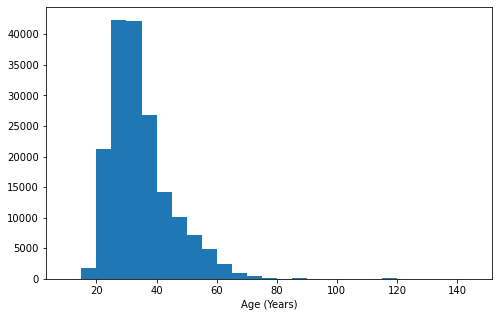

In [17]:
# plot ages a standard-scaled plot
binsize = 5
bins = np.arange(10, bikes['member_age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bikes, x = 'member_age', bins = bins)
plt.xlabel('Age (Years)')
plt.show()

It is observed that the most of the members going on bike trips are 25 - 40 years of age. The frequency trails off as the age approaches 60 +  years.

The next analysis is of the categorical data.

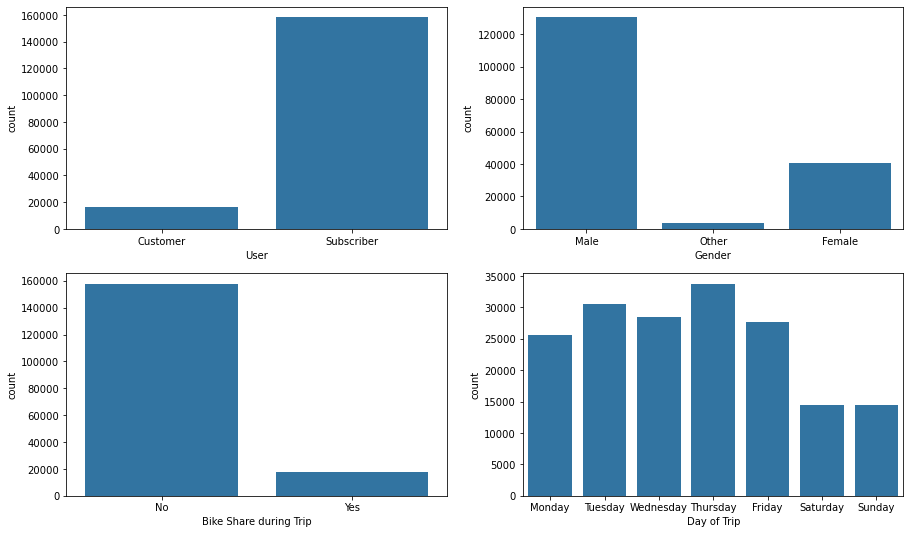

In [18]:
# plot all the categorical data to get insights
fig, ax = plt.subplots(nrows=2, ncols=2 ,figsize = [15,9])
ax = ax.flatten()

base_color = sb.color_palette()[0]

sb.countplot(data=bikes, x='user_type', color=base_color, ax = ax[0])
ax[0].set_xlabel('User')

sb.countplot(data=bikes, x='member_gender', color=base_color, ax = ax[1])
ax[1].set_xlabel('Gender')

sb.countplot(data=bikes, x='bike_share_for_all_trip', color=base_color, ax = ax[2])
ax[2].set_xlabel('Bike Share during Trip')

sb.countplot(data=bikes, x='start_day', color=base_color, ax = ax[3])
ax[3].set_xlabel('Day of Trip')

plt.show()

As seen in the plots:
- Most of the users of the bikes are Subscribers.
- Most of the trips were by those who identify as male followed by female and lastly those who identified otherwise.
- During the trips, most of the users did not share the rides.
- Most trips were taken on Thursdays while Saturday and Sunday had the least trips.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration variable had a large range of values and had to be transformed using a log scale for better understanding. Under transformation, the data was seen to be unimodal with a peak at 10 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The age variable had a normal distribution with few outliers that did not affect the analysis of the dataset. The other categorical variables had consistent values of their levels.

## Bivariate Exploration

Firstly, I'll check the pairwise relationship of the numerical and categorical variables.

<Figure size 720x720 with 0 Axes>

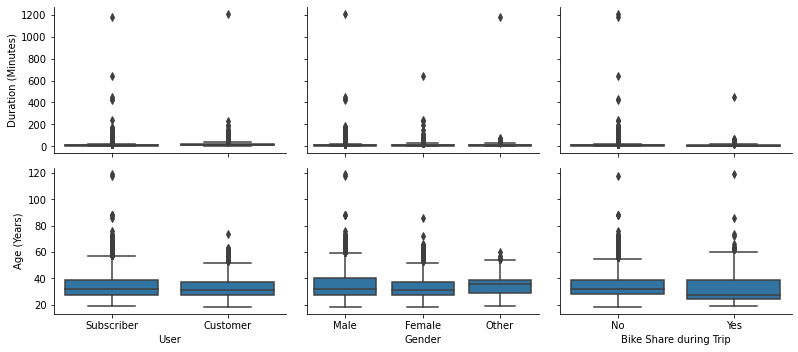

In [19]:
# due to high volume of trip data, only a sample is used for the box plot to show relationships.
trip_sample = bikes.sample(n=6000, replace = False)

def boxgrid(x, y, **kwargs):
    """ function for creating box plots. """
    base_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=base_color)
    
plt.figure(figsize = [10, 10])

g = sb.PairGrid(data = trip_sample, y_vars = ['duration', 'member_age'], x_vars = ['user_type','member_gender','bike_share_for_all_trip'], aspect = 1.5)

g.map(boxgrid);

xlabels = ['User','Gender','Bike Share during Trip']
ylabels = ['Duration (Minutes)', 'Age (Years)']

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        g.axes[j,i].xaxis.set_label_text(xlabels[i])
        g.axes[j,i].yaxis.set_label_text(ylabels[j])
        
plt.show()

There is a fascinating relationships between the categorical variables and the numeric variables. Most categories seem to have 30 years as the median age with the interquartile range generally being between 30-40 years. However, not much can be determined from the trip duration plots.




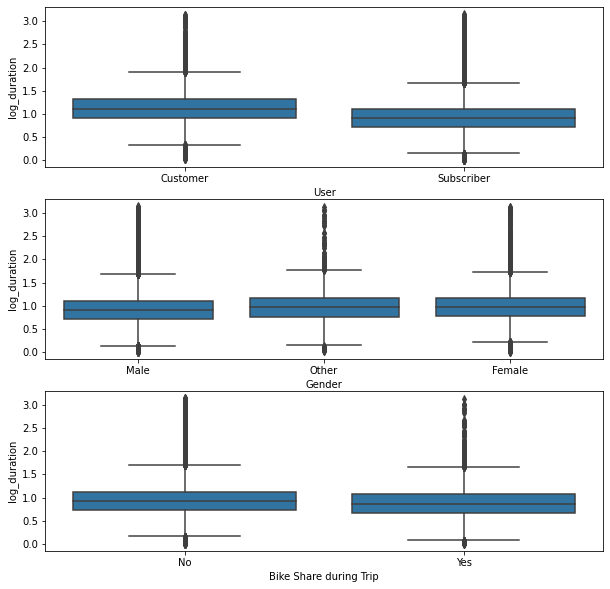

In [20]:
def log_trans(x, inverse = False):
    """  function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

c_vars = ['user_type','member_gender','bike_share_for_all_trip']
bikes['log_duration'] = bikes['duration'].apply(log_trans) #new column

fig, ax = plt.subplots(nrows = 3 , figsize = [10,10])
base_color = sb.color_palette()[0]


for i in range(len(c_vars)):
    var = c_vars[i]
    sb.boxplot(data = bikes, x = var, y = 'log_duration', ax = ax[i],color = base_color)
    
xlabels = ['User','Gender','Bike Share during Trip']
for i in range(len(xlabels)):   
    ax[i].xaxis.set_label_text(xlabels[i])
    

plt.show()

After logarithmic transformation of the trip duration, it was observed that the median duration for nearly all features plotted was 10 minutes. There were outliers in the plots too given the volume of trip count in the dataset. 

Next, let's look at the relationship between the numeric variables.

In [21]:
def xy_labels(xl,yl):
    ''' function for labelling axes'''
    plt.xlabel(xl)
    plt.ylabel(yl)
    

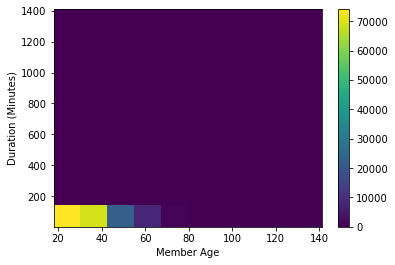

In [22]:
# plot heatmap
plt.hist2d(data = bikes, x='member_age', y='duration')
plt.colorbar()
xy_labels('Member Age','Duration (Minutes)');

From the heatmap, it is deduced that most of the trips are below 200 minutes and the number decreases with increases with age of the members.

Next, let's chech the crelationship between gender and users and bike sharing.

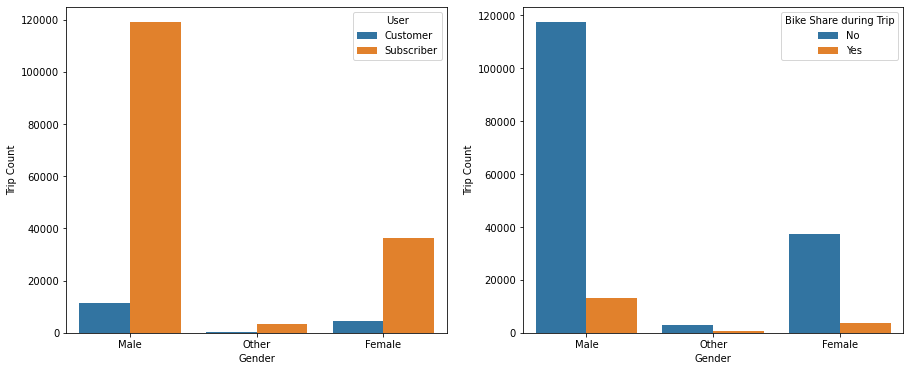

In [23]:
plt.figure(figsize = [15, 6])

plt.subplot(1, 2, 1)
sb.countplot(data = bikes, x = 'member_gender', hue = 'user_type')
plt.legend(title='User')
xy_labels('Gender','Trip Count');

plt.subplot(1, 2, 2)
sb.countplot(data = bikes, x = 'member_gender', hue = 'bike_share_for_all_trip')
plt.legend(title='Bike Share during Trip')
xy_labels('Gender','Trip Count');

There does not seem to be much interaction between gender and users/ bike sharing. From the clustered barplots, it is observed that there are more subscribers than customers in all gender categories. Moreover, there seem to be a preference of not sharing rides among all gender categories.

Next, let's check the relationship between the day of trip and other categorical variables.

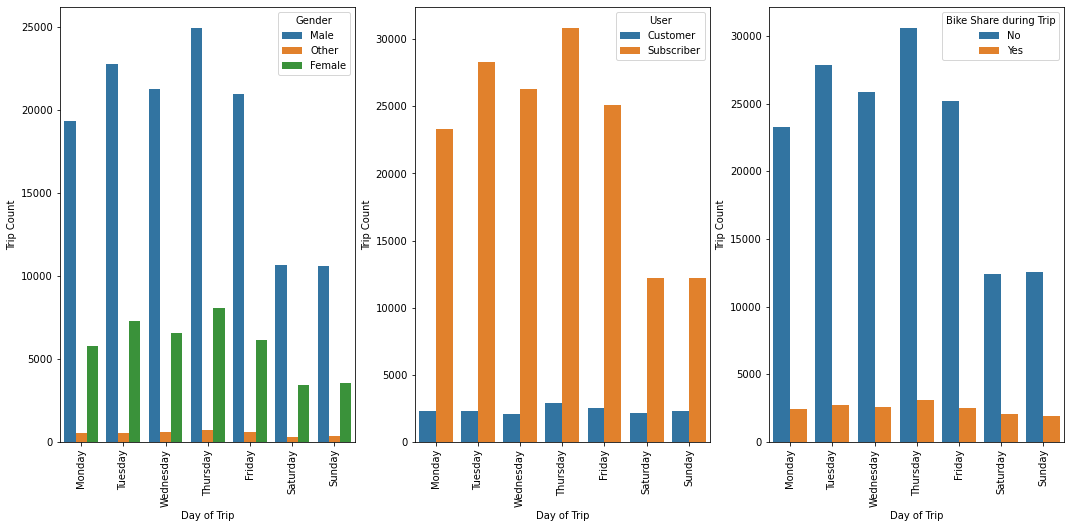

In [24]:
plt.figure(figsize = [18, 8])

plt.subplot(1, 3, 1)
sb.countplot(data = bikes, x = 'start_day',hue = 'member_gender')
plt.xticks(rotation=90)
plt.legend(title='Gender')
xy_labels('Day of Trip','Trip Count');


plt.subplot(1, 3, 2)
sb.countplot(data = bikes, x = 'start_day', hue = 'user_type')
plt.xticks(rotation=90)
plt.legend(title='User')
xy_labels('Day of Trip','Trip Count');

plt.subplot(1, 3, 3)
sb.countplot(data = bikes, x = 'start_day', hue = 'bike_share_for_all_trip')
plt.xticks(rotation=90)
plt.legend(title='Bike Share during Trip')
xy_labels('Day of Trip','Trip Count');

From the clustered barplots, it is noted that Thursday had the highest trip count. The male gender had the highest trip count each day. As for the users, the subscribers tended to take more trips and the number of customers was fairly close throughout the days. The was a high number of no bike sharing during the trips each day.

Next, let's check the relationship between the day of the trip and the numerical variables.

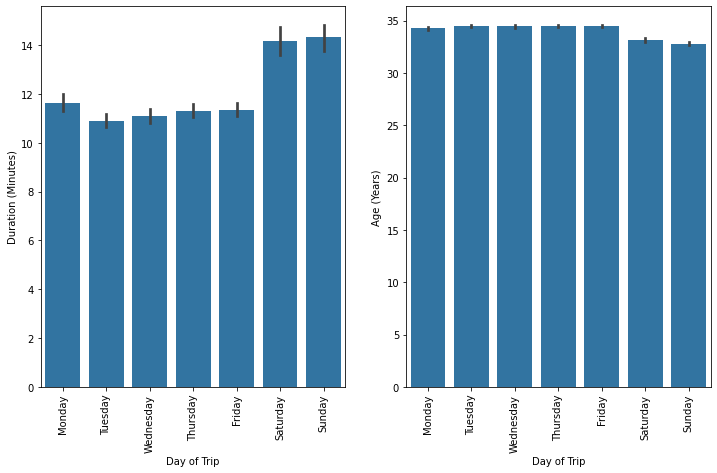

In [25]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [12, 7])

plt.subplot(1, 2, 1)
sb.barplot(data=bikes, x='start_day', y='duration',color=base_color)
plt.xticks(rotation=90)
xy_labels('Day of Trip','Duration (Minutes)');

plt.subplot(1, 2, 2)
sb.barplot(data=bikes, x='start_day', y='member_age',color=base_color)
plt.xticks(rotation=90)
xy_labels('Day of Trip','Age (Years)');

From the adapted barplot, it is noticed that on Saturday and Sunday, the average duration (14 minutes) of trips was longer than the other days of the week though there is a higher uncertainty in their means.

Furthermore, it is observed that the average age of those taking bike trips during the week were approximately 33 years. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
As earlier expected, different features did have an effect on the trip duration. The relationship between ages and trip duration highlighted that most of the trips are below 200 minutes and the number decreased with the increase in age of the members. In addition, from the relationship between day of the trip and trip duration, it was seen that longer trips were taken on Saturday and Sunday.
  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Other fascinating highlights were:
* The  relationship between day of the week and other categorical variables where there were significantly more male members, subscriber users and  members who did not share their bikes in the entire week.
* The relationships between the categorical where it was observed that there were more subscribers than customers and there was a preference of not sharing rides among all gender categories.

## Multivariate Exploration

I'll explore the multivariate relationships of numerical and categorical variables.


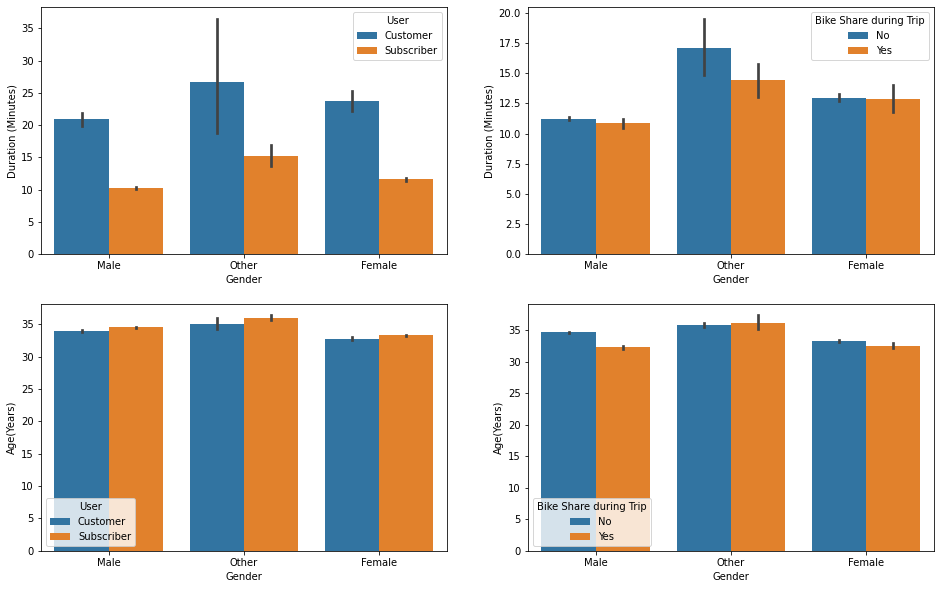

In [26]:
plt.figure(figsize = [16, 10])

plt.subplot(2, 2, 1)
sb.barplot(data = bikes, x = 'member_gender', y = 'duration', hue = 'user_type')
plt.legend(title='User')
xy_labels('Gender','Duration (Minutes)');

plt.subplot(2, 2, 2)
sb.barplot(data = bikes, x = 'member_gender', y = 'duration', hue = 'bike_share_for_all_trip')
plt.legend(title='Bike Share during Trip')
xy_labels('Gender','Duration (Minutes)');

plt.subplot(2, 2, 3)
sb.barplot(data = bikes, x = 'member_gender', y = 'member_age', hue = 'user_type')
plt.legend(title='User')
xy_labels('Gender','Age(Years)');

plt.subplot(2, 2, 4)
sb.barplot(data = bikes, x = 'member_gender', y = 'member_age', hue = 'bike_share_for_all_trip')
plt.legend(title='Bike Share during Trip')
xy_labels('Gender','Age(Years)');


From the clustered bar charts:
- It is observed that among all the genders, the customer users took longer trips as compared to subscribers. In addition, users from the *other* gender seem to take longer trips as compared to the remaining genders.
- Regardless of whether or not there was bike sharing during the trip, the trip durations of the male and female genders were close. However, for the *other* gender, it is noted that those who did not share bikes during the trip took slightly longer trips than those who shared their bikes.
- It is seen that among all the genders,the average age of the users is approximately 34 years regardless of whether thay are customers or subscribers.
- It is only in the male gender that there is a slight difference in the average ages of those who share and those that do not share.

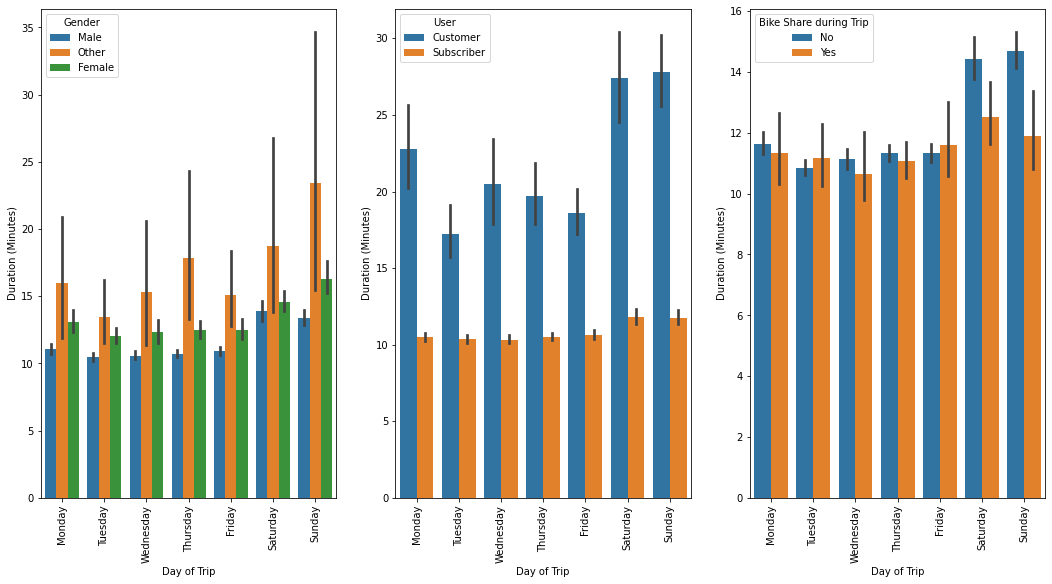

In [27]:
plt.figure(figsize = [18, 9])

plt.subplot(1, 3, 1)
sb.barplot(data = bikes, x = 'start_day', y = 'duration', hue = 'member_gender')
plt.xticks(rotation=90)
plt.legend(title='Gender')
xy_labels('Day of Trip','Duration (Minutes)');

plt.subplot(1, 3, 2)
sb.barplot(data = bikes, x = 'start_day', y = 'duration', hue = 'user_type')
plt.xticks(rotation=90)
plt.legend(title='User')
xy_labels('Day of Trip','Duration (Minutes)');

plt.subplot(1, 3, 3)
sb.barplot(data = bikes, x = 'start_day', y = 'duration', hue = 'bike_share_for_all_trip')
plt.xticks(rotation=90)
plt.legend(title='Bike Share during Trip')
xy_labels('Day of Trip','Duration (Minutes)');

From the adapted clustered bar charts:
- It is noted that the *other* category of gender had the highest mean duration of the trips taken during the week followed by female and lastly male genders. However, it is seen that there is quite a huge uncertainty in the average duration for the *other* gender.
- Customers can be seen to take longer trip durations across the week as compared to subscribers whose trip durations lasted approximately 10 minutes.
- It is observed that during the week, trips with and without bike sharing lasted approximately the same time. However, on Saturday and Sunday the trips without bike sharing lasted approximately 2 minutes longer.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
From the relationship between gender, users and trip duration, it was clear that the customer users took longer trips as compared to subscribers. Moreover, from the relationship between day of the trip, users and trip duration, it was noted that customer users still took longer trips in the entire week. This could not have been easily established in the bivariate plots. 

### Were there any interesting or surprising interactions between features?
The most fascinating insight was how features with least counts stood out. Particularly, the *other* gender and *customer* users had significantly higher averages of the trip durations across the week.

## Conclusions

The main variable of interest in the analysis was the duration of the trips taken using Ford GoBikes System. During exploration, fascinating relationships between the trip duration and other variables in the dataset were found. The trip duration was observed to have a unimodal distribution and had a median of 10 minutes. Using a heatmap to establish the relationship between trip duration and ages of members, it was noted that most of the trips were below 200 minutes and the number of trips decreased with the increase of the age of the members. An adapted barplot was then used to highlight the relationship between the trip duration and the day of the trip, it  was noticed that the average duration of trips was longer on Saturday and Sunday than on the other days of the week. From the relationships of categorical variables and trip duration, it was seen that longer trips were taken by customer users of all genders, _other_ gender and members who did not share bikes during the trip.

Outside the main variable of interest, it was noticed that the average age of  bike users of all genders was approximately 34 years, there was a preference of not sharing rides among all gender categories, most trips were taken on Thursdays while Saturday and Sunday had the least number of trips.Furthermore, across the week, significantly more male members, subscriber users and members who did not share their bikes were taking bike trips.
